<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana11/MinimosCuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI")
!ls

Parcial2    Semana1   Semana11	Semana3  Semana5  Semana7  Semana9
ProyectoML  Semana10  Semana2	Semana4  Semana6  Semana8


In [13]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana11/Data/MinimosLineal.txt'
file

'/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana11/Data/MinimosLineal.txt'

In [14]:
data = np.loadtxt(file)
x = data[:,0]
y = data[:,1]

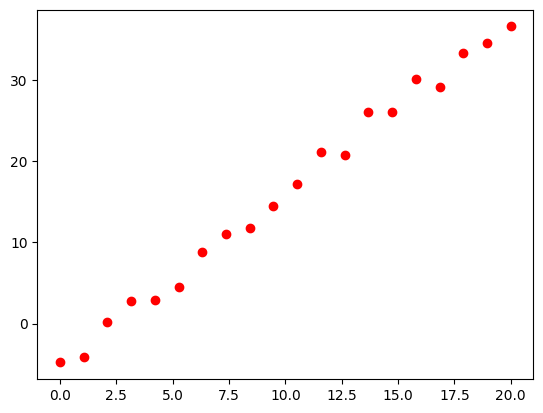

In [15]:
plt.scatter(x,y,color='red')

In [23]:
def GetFit(x,y,n=1):

  l = x.shape[0] # Cantidad de datos
  b = y

  A = np.ones((l,n+1))

  for i in range(1,n+1):
    A[:,i] = x**i

  print(A)

In [24]:
GetFit(x,y)

[[ 1.        0.      ]
 [ 1.        1.052632]
 [ 1.        2.105263]
 [ 1.        3.157895]
 [ 1.        4.210526]
 [ 1.        5.263158]
 [ 1.        6.315789]
 [ 1.        7.368421]
 [ 1.        8.421053]
 [ 1.        9.473684]
 [ 1.       10.52632 ]
 [ 1.       11.57895 ]
 [ 1.       12.63158 ]
 [ 1.       13.68421 ]
 [ 1.       14.73684 ]
 [ 1.       15.78947 ]
 [ 1.       16.84211 ]
 [ 1.       17.89474 ]
 [ 1.       18.94737 ]
 [ 1.       20.      ]]
